In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import smartlab as sl
from scipy.optimize import curve_fit

%matplotlib inline

In [3]:
alpha = 0.041
T0 = 298
deltaT = 0.2
data = pd.read_csv('data.tsv', delimiter='\t')
data['$R_g,\ \Omega$'] = data.iloc[:, 1] * 10
data['$T,\ K$'] = np.round(T0 + data.iloc[:, 0] / alpha, 1)
data['$1/T,\ kK^{-1}$'] = np.round(1000 / data.iloc[:, 3], 3)
data['$\Delta(1/T),\ kK^{-1}$'] = np.round(1000 * deltaT / data.iloc[:, 3] ** 2, 3)
data['$\ln R_g$'] = np.round(np.log(data.iloc[:, 2]), 3)
data['$\Delta (\ln R_g)$'] = np.round(1 / data.iloc[:, 1], 3)
data

NameError: name 'pd' is not defined

In [47]:
sl.table(data, piece=12)

\begin{tabular}{rrrrrrrr}\\
$V,\ mV$ & $R_M,\ \Omega$ & $R_g,\ \Omega$ & $T,\ K$ & $1/T,\ kK^{-1}$ & $\Delta(1/T),\ kK^{-1}$ & $\ln R_g$ & $\Delta (\ln R_g)$\\ \hline
$0.03$ & $260.0$ & $2600.0$ & $298.7$ & $3.348$ & $0.002$ & $7.863$ & $0.004$ \\
$0.24$ & $170.0$ & $1700.0$ & $303.9$ & $3.291$ & $0.002$ & $7.438$ & $0.006$ \\
$0.45$ & $110.0$ & $1100.0$ & $309.0$ & $3.236$ & $0.002$ & $7.003$ & $0.009$ \\
$0.66$ & $79.0$ & $790.0$ & $314.1$ & $3.184$ & $0.002$ & $6.672$ & $0.013$ \\
$0.86$ & $60.0$ & $600.0$ & $319.0$ & $3.135$ & $0.002$ & $6.397$ & $0.017$ \\
$1.06$ & $42.0$ & $420.0$ & $323.9$ & $3.087$ & $0.002$ & $6.04$ & $0.024$ \\
$1.27$ & $33.0$ & $330.0$ & $329.0$ & $3.04$ & $0.002$ & $5.799$ & $0.03$ \\
$1.47$ & $26.0$ & $260.0$ & $333.9$ & $2.995$ & $0.002$ & $5.561$ & $0.038$ \\
$1.68$ & $21.0$ & $210.0$ & $339.0$ & $2.95$ & $0.002$ & $5.347$ & $0.048$ \\
$1.89$ & $17.0$ & $170.0$ & $344.1$ & $2.906$ & $0.002$ & $5.136$ & $0.059$ \\
$2.1$ & $13.0$ & $130.0$ & $349.2$ & $2.8

In [48]:
def lin(x, a, b):
    return a * x + b

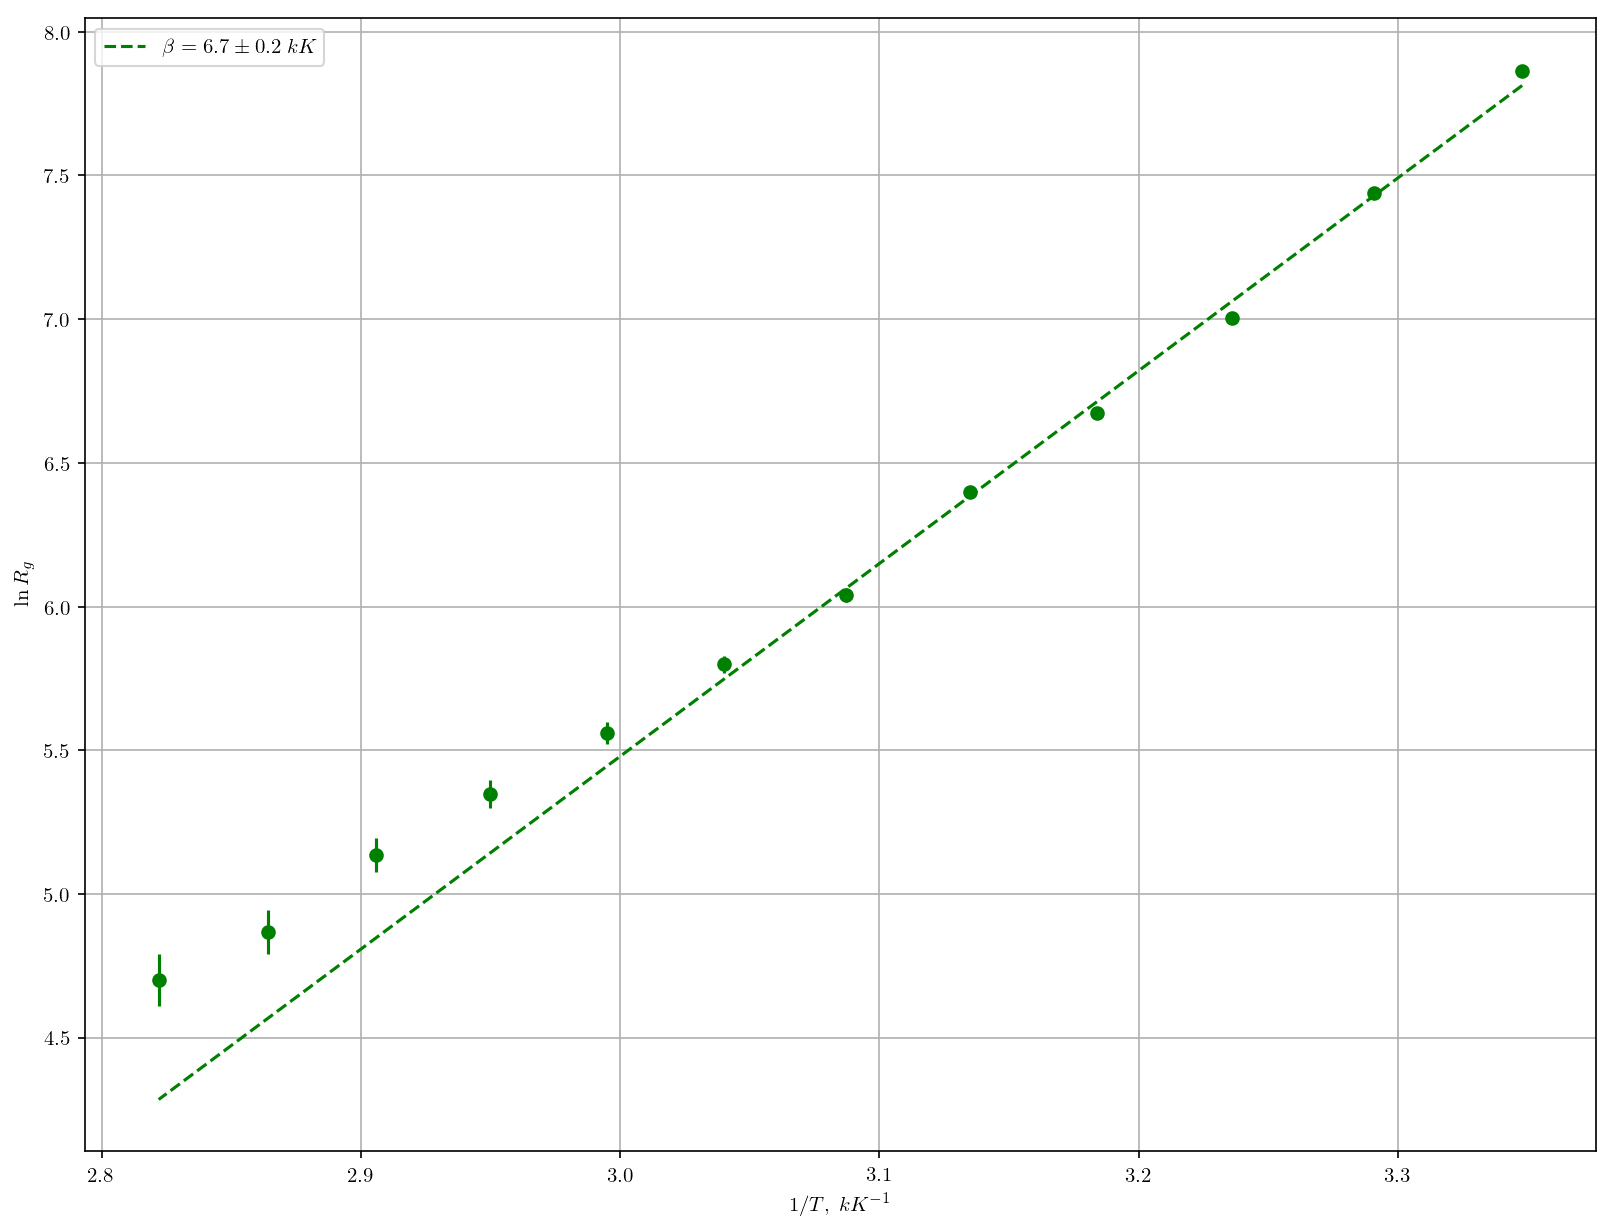

In [49]:
popt, pcov = curve_fit(lin, data.iloc[:-5, 4], data.iloc[:-5, 6])
x = np.linspace(data.iloc[0, 4], data.iloc[-1, 4], 100)

plt.figure(figsize=(13, 10), dpi=150)
plt.errorbar(data.iloc[:, 4], data.iloc[:, 6], xerr=data.iloc[:, 5], yerr=data.iloc[:, 7], fmt='go')
plt.plot(x, lin(x, popt[0], popt[1]), '--g')
plt.xlabel('$1/T,\ kK^{-1}$')
plt.ylabel('$\ln R_g$')
plt.grid()
plt.legend(['$\\beta={0:.1f}\\pm{1:.1f}\\ kK$'.format(popt[0], pcov[0][0] ** 0.5)], loc=2)
plt.savefig('graph.png')

In [51]:
200 * 1.38 * 1e-23 / (1.6 * 1e-19)

0.017249999999999998

In [4]:
180 + (32.5 - 32) / (106 - 32) * 5

180.03378378378378

In [2]:
5 / 74 / 2

0.033783783783783786

In [5]:
180.84 / 2 / 0.81

111.62962962962962